In [3]:
import sys
import pandas as pd
import matplotlib
import seaborn
import sklearn
print(sys.version)
print(pd.__version__)
print(matplotlib.__version__)
print(seaborn.__version__)
print(sklearn.__version__)
#importing the libraries and printing the versions

3.8.10 (default, Jun  2 2021, 10:49:15) 
[GCC 9.4.0]
1.3.0
3.4.2
0.11.1
0.24.2


In [4]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
#our dataset is in the games.csv file in 'boardgamegeek' folder which contains over 80000 board game reviews to analyse
#loading the data
df=pd.read_csv('boardgamegeek/games.csv')
df.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [6]:
print(df.columns)
print(df.shape)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)


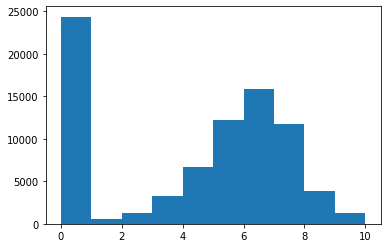

In [7]:
#We are going to train the model to predict the average rating of the game
#make a histogram of all average ratings in the average ratings column
plt.hist(df['average_rating'])
plt.show()

In [8]:
#as we see there are a lot of zero ratings in this dataset, which looks odd, let us check them
#checking first 5 rows
df[df['average_rating']==0]

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
13048,318,boardgame,Looney Leo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,1,0,0,0.0
13068,579,boardgame,Field of Fire,2002.0,2.0,0.0,0.0,0.0,0.0,12.0,0,0.0,0.0,2,0,0,1,0,0,0.0
13114,894,boardgame,LifeLinks,2000.0,1.0,8.0,10.0,10.0,10.0,8.0,0,0.0,0.0,2,0,1,1,0,0,0.0
13116,897,boardgame,Dear Abby,1992.0,3.0,4.0,60.0,60.0,60.0,13.0,0,0.0,0.0,7,1,0,0,0,0,0.0
13124,946,boardgame,Rolazone,1999.0,2.0,2.0,30.0,30.0,30.0,0.0,0,0.0,0.0,0,0,0,3,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81307,184441,boardgameexpansion,Micro Rome: Aegyptus,2015.0,1.0,1.0,0.0,30.0,0.0,10.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81308,184442,boardgame,Trivial Pursuit: Marvel Cinematic Universe Da...,2013.0,2.0,0.0,0.0,0.0,0.0,12.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81309,184443,boardgame,BEARanoia,2015.0,2.0,15.0,1.0,1.0,1.0,0.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81310,184449,boardgame,Freight,2015.0,2.0,4.0,60.0,30.0,60.0,8.0,0,0.0,0.0,0,0,0,0,0,0,0.0


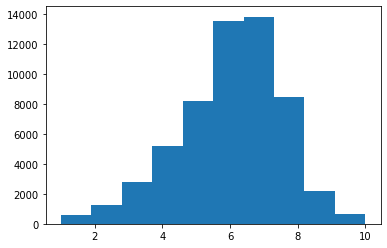

In [9]:
#lot of rows are present which have 0 values which are of no use to us
#remove rows with 0 values and remove rows with rating of 0
df=df[df['average_rating']>0]
df=df.dropna(axis=0)
#now creating histogram of cleaned data
plt.hist(df['average_rating'])
plt.show()

<AxesSubplot:>

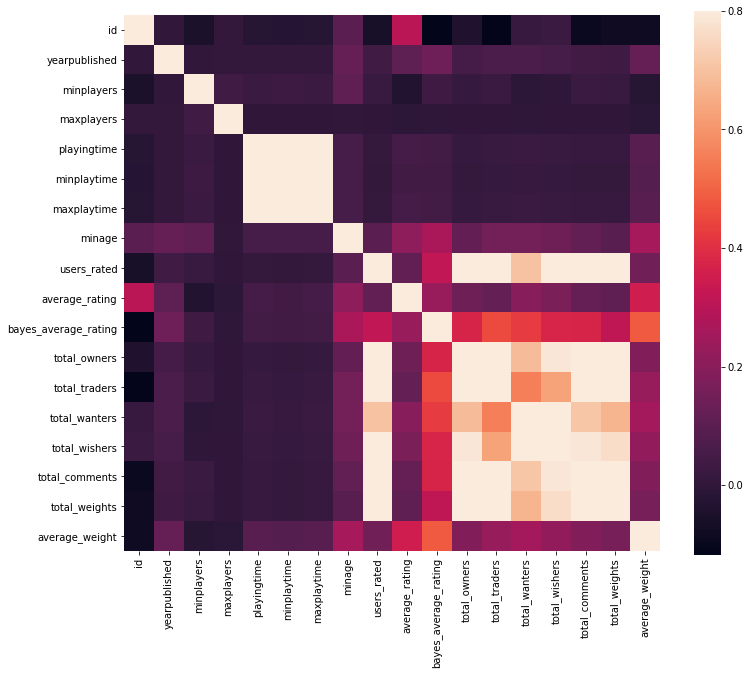

In [10]:
#using seaborn library to help visualize correlation matrix between parameters in better way using heatmap
correlation=df.corr()
fig=plt.figure(figsize=(12,10))
seaborn.heatmap(correlation,vmax=0.8,square=True)

In [11]:
#we are removing some columns we dont need like id, average_rating,bayes_average_rating,etc
#the feature to predict is the average rating
cols=df.columns.tolist()
cols=[c for c in cols if c not in ['id','average_rating','bayes_average_rating','name','type']]
target_var='average_rating'

In [12]:
#generating training and test datasets
train=df.sample(frac=0.8,random_state=1)
test=df.loc[~df.index.isin(train.index)]
#'isin' same as in, '~isin' same as not in
print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


In [13]:
#importing linear regression model and initializing the model class
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#fitting the model
lin_reg=LinearRegression()
lin_reg.fit(train[cols],train[target_var])


LinearRegression()

In [14]:
#to generate predictions
predictions=lin_reg.predict(test[cols])
#generate mean squared error between our predictions and actual values
mean_squared_error(predictions,test[target_var])

2.078819032629324

In [15]:
#importing random forest regression model and initializing the model class and then fitting model
from sklearn.ensemble import RandomForestRegressor
rand_forest=RandomForestRegressor()
rand_forest.fit(train[cols],train[target_var])

RandomForestRegressor()

In [16]:
#generate predictions and generate mean squared error between our predictions and actual values
predictions2=rand_forest.predict(test[cols])
mean_squared_error(predictions2,test[target_var])
#this gives us lesser error than linear regression model

1.485696885115332

In [22]:
#let us make predictions on any random 50 rows of the test set with 
# both linear regression and random forest regression models
df2=test.sample(n=50,random_state=1)
df2
#these are the random 50 rows

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
3515,3548,boardgame,Assault on Hoth: The Empire Strikes Back,1988.0,2.0,2.0,90.0,90.0,90.0,12.0,394,7.01502,6.02443,726,26,158,209,176,60,2.1333
39013,35901,boardgame,Verfhlt nochmal!,2003.0,2.0,6.0,10.0,10.0,10.0,3.0,9,6.44444,0.00000,40,1,0,0,7,3,1.0000
13351,1851,boardgame,Mythrole: Merchants,2001.0,2.0,6.0,240.0,240.0,240.0,12.0,1,2.00000,0.00000,3,1,1,3,0,0,0.0000
80078,181103,boardgameexpansion,Shadows of Brimstone: SECRET Enemy Set #1,2015.0,1.0,6.0,0.0,0.0,0.0,12.0,1,9.00000,0.00000,21,0,4,17,0,0,0.0000
29966,25290,boardgame,Candyman: Farewell to the Flesh,1995.0,2.0,5.0,0.0,0.0,0.0,0.0,1,1.00000,0.00000,6,1,3,5,4,1,1.0000
9511,19392,boardgame,Fruit Bandits,2005.0,3.0,5.0,30.0,30.0,30.0,8.0,100,5.76800,5.52983,123,13,0,6,46,17,1.2353
2535,142992,boardgame,Gravwell: Escape from the 9th Dimension,2013.0,1.0,4.0,20.0,20.0,20.0,12.0,1275,7.08931,6.50874,1897,53,151,578,322,82,1.8171
22565,16161,boardgame,The Wishbone Game,1997.0,2.0,4.0,30.0,30.0,30.0,6.0,2,4.00000,0.00000,12,3,0,0,3,0,0.0000
47428,60724,boardgame,Pocket Knight Chess,0.0,2.0,2.0,0.0,0.0,0.0,5.0,3,5.66667,0.00000,2,0,0,0,5,2,5.0000
51074,72843,boardgame,Starplayer: The Football Board Game,2010.0,2.0,4.0,90.0,90.0,90.0,8.0,8,6.87500,0.00000,6,0,0,2,6,0,0.0000


In [30]:
for i in range(len(df2)):
    x=lin_reg.predict(df2[cols].iloc[i].values.reshape(1,-1))
    y=rand_forest.predict(df2[cols].iloc[i].values.reshape(1,-1))
    z=df2[target_var].iloc[i]
    print("Linear regression : ",float(x),"\nRandom forest regression prediction: ",float(y),"\nActual value: ",z)
    if(abs(z-y)>=1 and abs(z-x)>=1):
        print("Model doesn't make accurate prediction for this example")
        print()
        continue
    if(abs(z-y)<abs(z-x)):
        print("Random forest regressor makes better prediction")
    else:
        print("Linear forest regressor makes better prediction")
    print()
    

Linear regression :  7.091106452960759 
Random forest regression prediction:  7.049012000000004 
Actual value:  7.01502
Random forest regressor makes better prediction

Linear regression :  5.720016852125644 
Random forest regression prediction:  4.972691000000001 
Actual value:  6.44444
Linear forest regressor makes better prediction

Linear regression :  5.6970037036416645 
Random forest regression prediction:  6.200211099999999 
Actual value:  2.0
Model doesn't make accurate prediction for this example

Linear regression :  5.775135880923555 
Random forest regression prediction:  8.684095600000001 
Actual value:  9.0
Random forest regressor makes better prediction

Linear regression :  5.605923203527392 
Random forest regression prediction:  4.6494696 
Actual value:  1.0
Model doesn't make accurate prediction for this example

Linear regression :  5.882710134722493 
Random forest regression prediction:  5.2861756999999985 
Actual value:  5.768
Linear forest regressor makes better pr